> In this notebook, we find our top countries by year for each of our four indexes. We also find the most correlated features with each index, as well as the total education quality worldwide for each year. Lastly, we format our data frame for heat map visualization in tableau.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../data/modeling/original_stats.csv', index_col='Year_Country')
model_df = pd.read_csv('../data/modeling/scaled_stats.csv', index_col='Year_Country')

uis = pd.read_csv('../data/UIS/uis.csv', index_col='Year_Country')
pisa = pd.read_csv('../data/pisa/pisa.csv', index_col='Year_Country')
world_bank = pd.read_csv('../data/world_bank/world_bank.csv', index_col='Year_Country')

In [3]:
school_climate = list(uis.columns[:-2])

school_resources = list(world_bank.columns[:-2])

learning_outcomes = list(pisa.columns) + list(world_bank.columns[-2:])

In [4]:
model_df.sort_values('ed_qual_index', ascending=False)['ed_qual_index'][:15]

Year_Country
2015_Finland     1.131133
2009_Finland     1.076251
2012_Finland     1.065708
2015_Spain       1.059025
2015_Belgium     1.049086
2012_Denmark     1.044720
2000_Sweden      1.042887
2015_Sweden      1.041655
2009_Belgium     1.038473
2006_Finland     1.030511
2015_Denmark     1.030226
2009_Denmark     1.028663
2015_Slovenia    1.026433
2015_Ireland     1.026188
2006_Belgium     1.019769
Name: ed_qual_index, dtype: float64

In [5]:
model_df.sort_values('climate_index', ascending=False)['climate_index'][:10]

Year_Country
2015_Finland      1.100000
2015_Denmark      1.045439
2015_Ireland      1.044536
2015_Lithuania    1.042688
2015_Belgium      1.038566
2015_Slovenia     1.031495
2006_Belgium      1.028028
2012_Belgium      1.024209
2015_Spain        1.018522
2015_Sweden       1.017748
Name: climate_index, dtype: float64

In [6]:
model_df.sort_values('resources_index', ascending=False)['resources_index'][:10]

Year_Country
2009_Republic of Moldova    1.100000
2015_Republic of Moldova    1.080842
2012_Republic of Moldova    1.078640
2015_Cyprus                 1.073287
2000_Sweden                 1.072440
2003_Denmark                1.067790
2000_Denmark                1.065954
2006_Denmark                1.064698
2015_Tunisia                1.063200
2015_Uruguay                1.060781
Name: resources_index, dtype: float64

In [7]:
model_df.sort_values('learning_index', ascending=False)['learning_index'][:10]

Year_Country
2012_Singapore            1.100000
2015_Singapore            1.094854
2015_Spain                1.062294
2006_Finland              1.061270
2012_Spain                1.060064
2009_Spain                1.051692
2009_Finland              1.051049
2012_Republic of Korea    1.046899
2012_Japan                1.046642
2009_Republic of Korea    1.045438
Name: learning_index, dtype: float64

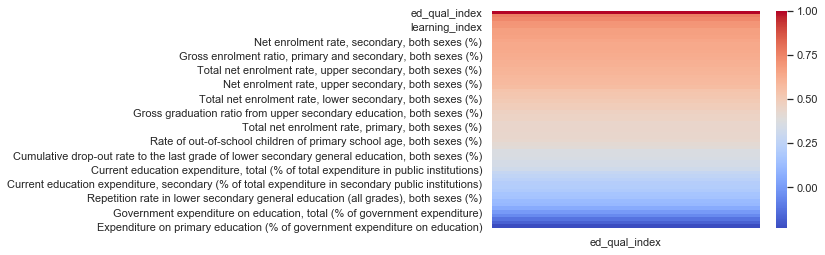

In [8]:
sns.heatmap(model_df.corr().sort_values('ed_qual_index', ascending=False)[['ed_qual_index']],
           cmap='coolwarm');

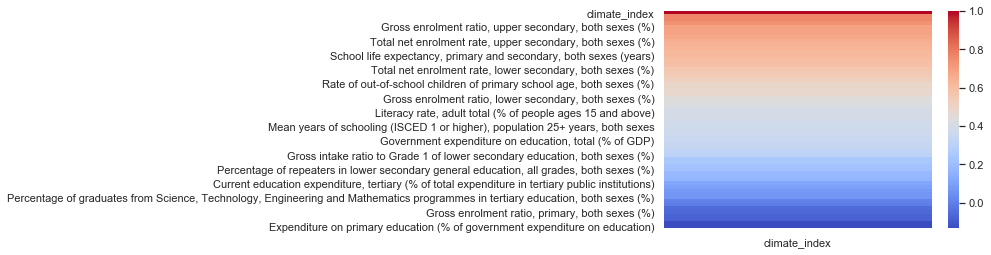

In [9]:
sns.heatmap(model_df.corr().sort_values('climate_index', ascending=False)[['climate_index']],
            cmap='coolwarm');

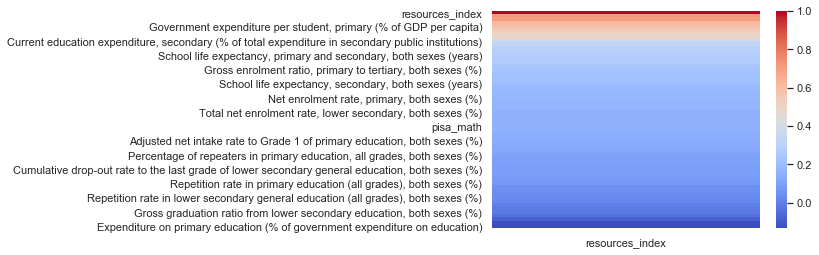

In [10]:
sns.heatmap(model_df.corr().sort_values('resources_index', ascending=False)[['resources_index']],
            cmap='coolwarm');

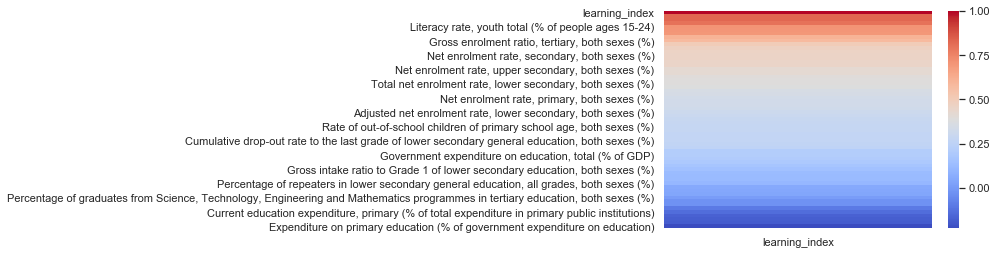

In [11]:
sns.heatmap(model_df.corr().sort_values('learning_index', ascending=False)[['learning_index']],
            cmap='coolwarm');

In [12]:
years = [year for year in range(2000, 2016, 3)]
years

[2000, 2003, 2006, 2009, 2012, 2015]

In [13]:
for year in years:
    indices = [index for index in df.index if str(year) in index]
    mean = model_df.loc[indices]['ed_qual_index'].mean()
    print(f"{year} Education Quality Index Mean: {round(mean, 4)}")

2000 Education Quality Index Mean: 0.8822
2003 Education Quality Index Mean: 0.8897
2006 Education Quality Index Mean: 0.8988
2009 Education Quality Index Mean: 0.9132
2012 Education Quality Index Mean: 0.9167
2015 Education Quality Index Mean: 0.9332


In [14]:
countries = ['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
             'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
             'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Estonia', 'Finland',
             'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Indonesia',
             'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Latvia',
             'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
             'Montenegro', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
             'Peru', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
             'Romania', 'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia', 'Spain',
             'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
             'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland',
             'United States of America', 'Uruguay', 'Viet Nam']

In [15]:
tableau_columns = [f"{year}_ed_qual_index" for year in years]
tableau_df = pd.DataFrame(index=countries, columns=tableau_columns)

for year in years:
    for country in countries:
        year_country = f"{year}_{country}"
        year_quality = f"{year}_ed_qual_index"
        tableau_df.loc[country, year_quality] = model_df.loc[year_country, 'ed_qual_index']

tableau_df.head()

,2000_ed_qual_index,2003_ed_qual_index,2006_ed_qual_index,2009_ed_qual_index,2012_ed_qual_index,2015_ed_qual_index
Albania,0.814772,0.8317,0.8352,0.829557,0.893832,0.894821
Algeria,0.829256,0.832389,0.802228,0.864394,0.869001,0.836084
Argentina,0.849601,0.90757,0.961576,0.995862,0.998453,0.978461
Australia,0.921688,0.905468,0.937909,0.925714,0.897989,1.01782
Austria,0.927494,0.954182,0.958969,0.948516,0.96793,0.958087


In [43]:
for year in years:
    year_col = f"{year}_ed_qual_index"
    top_countries = list(tableau_df[year_col].sort_values(ascending=False).index[:8])
    
    print(f"Top Countries in {year}:")
    print(top_countries)

Top Countries in 2000:
['Sweden', 'Denmark', 'Finland', 'Estonia', 'Norway', 'Belgium', 'Latvia', 'Switzerland']
Top Countries in 2003:
['Sweden', 'Finland', 'Norway', 'Belgium', 'Denmark', 'Switzerland', 'Ireland', 'Austria']
Top Countries in 2006:
['Finland', 'Belgium', 'Denmark', 'Sweden', 'Ireland', 'Republic of Korea', 'Argentina', 'Norway']
Top Countries in 2009:
['Finland', 'Belgium', 'Denmark', 'Ireland', 'Spain', 'Cyprus', 'Sweden', 'Argentina']
Top Countries in 2012:
['Finland', 'Denmark', 'Belgium', 'Ireland', 'Spain', 'Republic of Moldova', 'Singapore', 'Argentina']
Top Countries in 2015:
['Finland', 'Spain', 'Belgium', 'Sweden', 'Denmark', 'Slovenia', 'Ireland', 'Australia']
